[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/13_traffic/car_following_space_ode45.ipynb)

### A car following model where acceleration is based on distance from the car ahead

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import IPython.display as IP

We will use the Python package `solve_ivp` to solve the ODE. Here are the main parameters and returns of `solve_ivp`: 


`parameters:`

    fun    :      right-hand side of the system of the form fun(t, y)
    t_span :      2-tuple of floats of the interval of integration (t0, tf) 
    y0     :      initial state in array-like format (n,)
    args   :      optional, tuple of additional arguments to pass to the user-defined function
                  if fun has the form fun(t, y, a, b, c), we would have args = (a, b, c)
    
`returns: `

    t      :      time points 
    y      :      values of the solution at time t


For more information on `solve_ivp`, see the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html" target="_blank">Python documentation</a>.

In [2]:
# the following defines the function on the right hand side of the ODE to be integrated 
def F(t, y, ncars):
    """Define the RHS of the ODE to be integrated

    Args:
        t (float): 1-D independent variable (time)
        y (numpy.ndarray): population 
        ncars (int): number cars

    Returns:
        numpy.ndarray: differential equation
        
    """
    
    # Reading out the position and speeds of the cars from the y vector
    position = np.array(y[:ncars])
    
    speed = np.zeros((ncars,), dtype=np.float32)
    speed[0] = 1. + np.random.normal()*0.01 # leading car velocity is prescribed and not part of the solution
    speed[1:] = np.array(y[ncars:]) # the speeds of the following cars are given by the last ncar-1 component of the y vector
    
    # Acceleration depends on inter-car spacing
    # Assumes a normal spacing of 1
    acceleration = np.array(position[:ncars-1] - position[1:]) - 1.
    
    dydt = np.zeros((2*ncars-1,), dtype=np.float32())
    dydt[:ncars] = speed
    dydt[ncars:] = acceleration
    
    return dydt

In [3]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

In [4]:
# Initial condition
ncars = 10
t_sim = 20. # total simulation time 
y0 = np.ones((2*ncars-1,), dtype=np.float32())
y0[:ncars,] = np.array(range(ncars, 0, -1), dtype=np.float32())  

# Integrate using solve_ivp
sol = solve_ivp(F, [0, t_sim], y0, args = [ncars], max_step = 0.1)

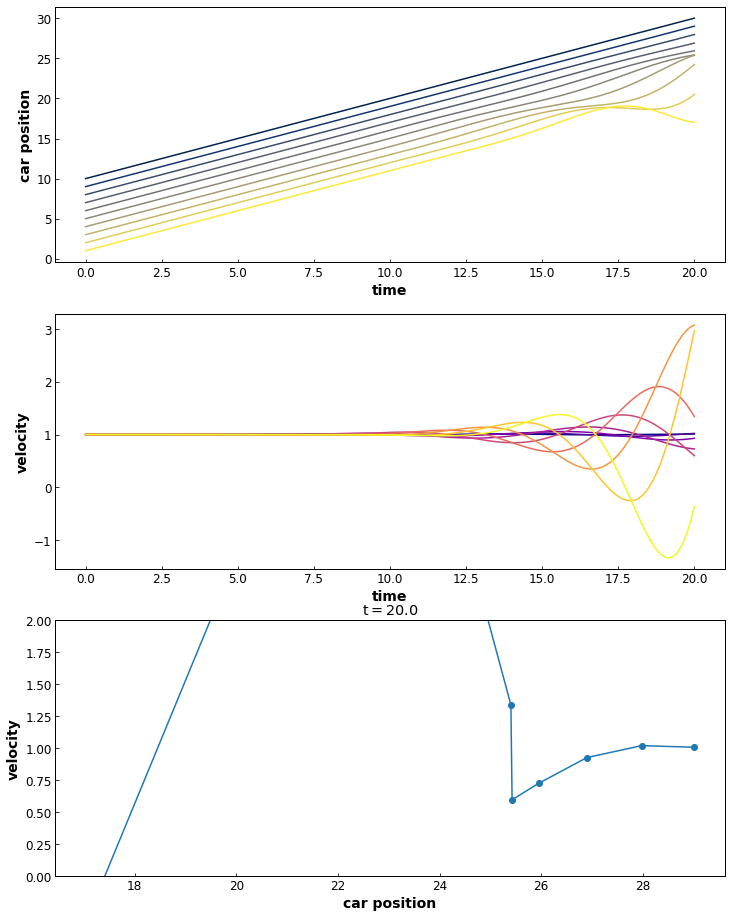

In [5]:
fig, axs = plt.subplots(nrows=3, figsize=(12,16))

# Create a color gradient for plotting all solutions
# Check out more colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
colors_pos = plt.cm.cividis(np.linspace(0.,1.,ncars))
colors_vel = plt.cm.plasma(np.linspace(0.,1.,ncars-1))

for i, time in enumerate(sol.t):
    axs[0].cla()
    axs[1].cla()
    axs[2].cla()
    
    for car in range(ncars): 
        axs[0].plot(sol.t, sol.y[car, :], color=colors_pos[car])
    axs[0].set(xlabel='time', ylabel='car position')

    for car in range(ncars-1):
        axs[1].plot(sol.t, sol.y[ncars+car,:], color=colors_vel[car])
    axs[1].set(xlabel='time', ylabel='velocity')
    
    axs[2].plot(sol.y[1:ncars,i], sol.y[ncars:,i], '-o')
    axs[2].set_title(r'$t = %.1f$' % time)
    axs[2].set(xlabel='car position', ylabel='velocity')
    axs[2].set_ylim(0, 2)
    
    IP.display(fig)
    IP.clear_output(wait = True)
    plt.pause(0.005)